# Introduction to Machine Learning



## Introduction:  

All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Hence a need for feature engineering arises. Feature engineering efforts mainly have two goals:
- Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
- Improving the performance of machine learning models.

In this webinar we will summarizes the main techniques of feature engineering that are most commonly used. Some techniques might work better with some algorithms or datasets, while some of them might be beneficial in all cases. The best way to achieve expertise in feature engineering is practicing different techniques on various datasets and observing their effect on model performances.

**List of Techniques**
1. Imputation
2. Handling Outliers
3. Binning
4. Log Transform
5. One-Hot Encoding
6. Grouping Operations
7. Feature Split
8. Scaling

All we use is NumPy and Pandas to do perform Feature Engineering to sort out the useful data from the mess. 

<img src="https://img-a.udemycdn.com/course/750x422/1304050_ee0f_8.jpg" alt="Numpy Logo" width="500">

```python
import pandas as pd
import numpy as np
```

### *1. Imputation*

Missing values are one of the most common problems you can encounter when you try to prepare your data for machine learning. The reason for the missing values might be human errors, interruptions in the data flow, privacy concerns, and so on. Whatever is the reason, missing values affect the performance of the machine learning models.

The most simple solution to the missing values is to drop the rows or the entire column. There is not an optimum threshold for dropping but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.

```python
threshold = 0.7

#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]
```

### Numerical Imputation

Imputation is a more preferable option rather than dropping because it preserves the data size. However, there is an important selection of what you impute to the missing values.
The best imputation way is to use the medians of the columns. As the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect.

```python
#Filling all missing values with 0
data = data.fillna(0)

#Filling missing values with medians of the columns
data = data.fillna(data.median())
```

### Categorical Imputation

Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns. But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a category like “Other” might be more sensible, because in such a case, your imputation is likely to converge a random selection.

```python
#Max fill function for categorical columns
data['column_name'].fillna(data['column_name'].value_counts().idxmax(), inplace=True)
```

### *2. Handling Outliers*

### Outlier Detection with Standard Deviation

If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. Then what x should be?
There is no trivial solution for x, but usually, a value between 2 and 4 seems practical. In addition, z-score can be used instead of the formula above. Z-score (or standard score) standardizes the distance between a value and the mean using the standard deviation.

```python
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = data['column'].mean () + data['column'].std () * factor
lower_lim = data['column'].mean () - data['column'].std () * factor

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]
```

### Outlier Detection with Percentiles

Another mathematical method to detect outliers is to use percentiles. You can assume a certain percent of the value from the top or the bottom as an outlier. The key point is here to set the percentage value once again, and this depends on the distribution of the data.

```python
#Dropping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)

data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]
```

### An Outlier Dilemma: Drop or Cap

Another option for handling outliers is to cap them instead of dropping. So you can keep your data size and at the end of the day, it might be better for the final model performance.
On the other hand, capping can affect the distribution of the data, thus it better not to exaggerate it.

```python
#Capping the outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)
data.loc[(df[column] > upper_lim),column] = upper_lim
data.loc[(df[column] < lower_lim),column] = lower_lim
```

### *3. Data Binning*

<div style="text-align:center"><img src="https://miro.medium.com/max/702/0*XWta_U67Nv9udfY-.png"></div>

Data binning (also called Discrete binning or bucketing) is a data pre-processing technique used to reduce the effects of minor observation errors. The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval, often the central value. It is a form of quantization. The main motivation of data binning is to make the model more robust and prevent overfitting, however, it has a cost to the performance. The trade-off between performance and overfitting is the key point of the binning process.

```python
#Numerical Binning Example

data['bin'] = pd.cut(data['value'], bins=[0,30,70,100], labels=["Low", "Mid", "High"])
```

OUTPUT
```
    value   bin
0      2   Low
1     45   Mid
2      7   Low
3     85  High
4     28   Low
```

INPUT:
```
#Categorical Binning Example
     Country
0      Spain
1      Chile
2  Australia
3      Italy
4     Brazil
```

```python
conditions = [
    data['Country'].str.contains('Spain'),
    data['Country'].str.contains('Italy'),
    data['Country'].str.contains('Chile'),
    data['Country'].str.contains('Brazil')]

choices = ['Europe', 'Europe', 'South America', 'South America']

data['Continent'] = np.select(conditions, choices, default='Other')
```

OUTPUT:
```
     Country      Continent
0      Spain         Europe
1      Chile  South America
2  Australia          Other
3      Italy         Europe
4     Brazil  South America
```

### *4. Log Transform*

Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. Benefits log transform:
- It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
- In most of the cases the magnitude order of the data changes within the range of the data. For instance, the difference between ages 15 and 20 is not equal to the ages 65 and 70. In terms of years, yes, they are identical, but for all other aspects, 5 years of difference in young ages mean a higher magnitude difference. This type of data comes from a multiplicative process and log transform normalizes the magnitude differences like that.
- It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.

```python
#Log Transform Example
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['log+1'] = (data['value']+1).transform(np.log)

#Negative Values Handling
#Note that the values are different
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)
```

### *5. One-hot encoding*

One-hot encoding is one of the most common encoding methods in machine learning. This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.

<div style="text-align:center"><img src="https://miro.medium.com/max/702/1*ZX99GOZ6-9_yJg6rZchTEA.png"></div>

```python
encoded_columns = pd.get_dummies(data['column'])
data = data.join(encoded_columns).drop('column', axis=1)
```

### *6. Grouping Operations*

In most machine learning algorithms, every instance is represented by a row in the training dataset, where every column show a different feature of the instance. This kind of data called “Tidy”. Tidy datasets are easy to manipulate, model and visualise, and have a specific structure: each variable is a column, each observation is a row, and each type of observational unit is a table.

### Categorical Column Grouping

There are three different ways for aggregating categorical columns:

- The first option is to select the label with the highest frequency. In other words, this is the max operation for categorical columns.

```python
data.groupby('id').agg(lambda x: x.value_counts().index[0])
```

- Second option is to make a pivot table. This approach resembles the encoding method in the preceding step with a difference.

<div style="text-align:center"><img src="https://miro.medium.com/max/702/1*VWBbZRkTrHJQrQfWlPQWUg.png"></div>

```python
#Pivot table Pandas Example
data.pivot_table(index='column_to_group', columns='column_to_encode', values='aggregation_column', aggfunc=np.sum, fill_value = 0)
```

- Last categorical grouping option is to apply a group by function after applying one-hot encoding. This method preserves all the data -in the first option you lose some-, and in addition, you transform the encoded column from categorical to numerical in the meantime.

### Numerical Column Grouping

Numerical columns are grouped using sum and mean functions in most of the cases. Both can be preferable according to the meaning of the feature.

```python
#sum_cols: List of columns to sum
#mean_cols: List of columns to average
grouped = data.groupby('column_to_group')

sums = grouped[sum_cols].sum().add_suffix('_sum')
avgs = grouped[mean_cols].mean().add_suffix('_avg')

new_df = pd.concat([sums, avgs], axis=1)
```

### *7. Feature Split*

Splitting features is a good way to make them useful in terms of machine learning. Most of the time the dataset contains string columns that violates tidy data principles. By extracting the utilizable parts of a column into new features:
- We enable machine learning algorithms to comprehend them.
- Make possible to bin and group them.
- Improve model performance by uncovering potential information

### *8. Scaling*

There are two common ways of scaling:

### Normalization

Normalization (or min-max normalization) scale all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers.

```python
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
```

### Standardization

Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

```python
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
```

# Introduction to Scikit-learn

 
We are going to see how to quickly and efficiently use the algorithms that we have studied till now. for that we are going to use [Scikit-learn](https://scikit-learn.org/stable/) which a python library in which we are going to see how to use:
 
1. Linear Regression
2. Logistic Regression
3. Support Vector Machines (SVM)
4. K-means Clustering
5. Naive Bayes
 
We are not going to show Decision trees as we already showed the scikit-learn implementation of that in the DecisionTrees and NaiveBayes Notebook.
 
The library has a host of other algorithms implemented that we won't be covering to keep things inline but do checkout scikit learn's documentation for that.


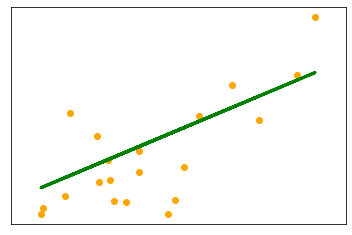

In [6]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

regression = linear_model.LinearRegression()

# Train the regression model
regression.fit(diabetes_X_train, diabetes_y_train)

# Make predictions
diabetes_y_pred = regression.predict(diabetes_X_test)

# Plot the linear line fitted by the model
plt.scatter(diabetes_X_test, diabetes_y_test,  color='orange')
plt.plot(diabetes_X_test, diabetes_y_pred, color='green', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Logistic Regression

In [13]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Loading the iris dataset
X, y = load_iris(return_X_y=True)

log_reg = LogisticRegression(random_state=0, max_iter=130)

# Training the model
log_reg.fit(X, y)

print("Accuracy: "+ str(log_reg.score(X, y)))

Accuracy: 0.9733333333333334


### Support Vector Machines(Classification)
 
In this example we are going to use SVM from scikit-learn and also do some preprocessing which is just subtracting the data by the mean and dividing by standard deviation and create a pipeline so you don't need to pass the data to the the preprocessing step and then to SVM.


In [14]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Loading the iris dataset
X, y = load_iris(return_X_y=True)

# Creating the pipeline with first the prepocessing
# and then SVM
svm_pipeline = make_pipeline(StandardScaler(),
                    SVC(gamma='auto'))

# Training the model
svm_pipeline.fit(X, y)

print("Accuracy: "+ str(svm_pipeline.score(X, y)))

Accuracy: 0.9733333333333334


As we see both Support Vector Machines and logistic regression were able to do good on a simple dataset. but SVMs generally outperform logistic regression in some conditions because the type of problem the SVM tries to solve is always convex and therefore always reaches a global minima and doesn't get stuck in local minima. 


### K-means Clustering

In [17]:
from sklearn.cluster import KMeans
import numpy as np

# Initializing fake data
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# n_clusters is the number of clusters you want to 
# divide the data in
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Shows which data point was categorized into which cluster
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

### Naive Bayes

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


[Anything and everything you need to know to use Scikit Learn](https://scikit-learn.org/stable/user_guide.html)

# What are Neural Networks?

[Neural Networks, forward and backward propagation](https://www.investopedia.com/terms/n/neuralnetwork.asp#:~:text=Neural%20networks%20are%20a%20series,fraud%20detection%20and%20risk%20assessment.) 

[Gradient Descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

[Activation Functions](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

## Activation Function
 
Where **$ g $** is a sigmoid function in our example and these type of functions are called **Activation functions** in a neural network, the purpose of a activation function in a neural network is to induce non- linearity, let's see what I mean by that when we calculate $ Z $ or $Y\_hat $ we always calculate a linear function of the form $$ y = mx + b $$ which if you remember is an equation of a line and that doesn't seems much non-linear to me and to fit the data better we include such activation functions which help in fitting complex functions to our data so we have better prediction or better accuracy at the end. 
 
<img src="./assets/sigmoid.png" width=300/>
 
A sigmoid function in python can be implemented something like this.

Sigmoid of -2 is 0.11920292202211755


Text(0, 0.5, 'Sigmoid')

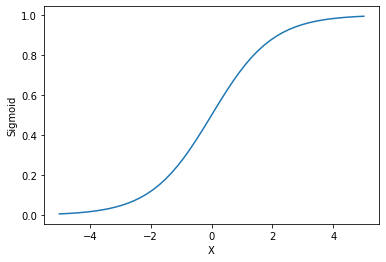

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def Sigmoid(x):
    return (1 / (1 + np.exp(-x)))
            
# change the value here to see different output.
inp = -2
print("Sigmoid of " + str(inp) + " is " + str(Sigmoid(inp)))

# Plot of Sigmoid function
inp = np.linspace(-5, 5)
plt.plot(inp, Sigmoid(inp))
plt.xlabel("X")
plt.ylabel("Sigmoid")

## Loss function 
 
So now as we know how to go through a step of forward Propagation let's take an example from our dummy dataset and try to understand how to find the hypothesis function $ h(X) $.
 
For this example we will assume that the values of $ W_1, b_1, W_2 $ and $ b_2 $ are $ 0.009, -0.0140, 2700 $ and $ 437 $ respectively, The values of of the parameters $ W $ and $ b $ in an actual neural network are not so extreme such as some in decimal and some in thousands. 
 
Substituting all the values in a single step of forward propagation we get.
 
1. $ Z = 0.0009 * 905 + -0.0140 = 0.8005 $
2. $ A = g(0.8005) = 0.6900 $
3. $ Y\_hat = 2700 * 0.6900 + 456 = 2319 $
 
$ Y\_hat $ which is equal to 2319 seems to be pretty close to the actual value of 2500 but how do we adjust the parameters to get more close to the actual value how should we measure the difference or the **loss**.
 
So the way we calculate the loss through a loss function called **Mean Square Error** is like this.
 
<img src="./assets/mse.png" width=300/>
 
> From [Wikipeadia](https://en.wikipedia.org/wiki/Mean_squared_error#:~:text=In%20statistics%2C%20the%20mean%20squared,values%20and%20the%20actual%20value.)
 
The loss for our example will be:
 
$$ 1/2 *  Σ ((2500 - 2319)^2 ) = 32761 $$
 
As we just had a single example $ n $ is equal to $ 1 $ and in deep learning we generally divide MSE with $ 2 $. A simple Implementation of the Mean Squared Error can be done something like this. This $ Σ $ charater is called and is used to denote sum of an vector in our case.


In [5]:
def MSE(Y, Y_hat):
    n = len(Y)
    return (np.sum((Y - Y_hat)**2)) / (2 * n)

# Try an array of numbers or just change the inputs to MSE to see how the output changes.
Y = np.array([2500])
Y_hat = np.array([2319])

MSE(Y, Y_hat)

1


16380.5

## What will we do
 
In this notebook we are going to implement a neural network from scratch in python and this time we are going to build a different neural network then the one that we used to explain neural networks. This time we are going to solve a classification problem. So there will be some minor changes to the network to use it for Classification. Let's look at them.
 
## Softmax 
 
A softmax function takes a vector of input and gives out a vector with probabilities that obviously add up to one because they are probabilities and in our case a softmax unit at the end will tell us the probability of the class that the neural network thinks it is.
 
Softmax is calculated by taking the elementwise exponent of the vector and then dividing elementwise by the sum of the vector after taking the exponent.
 
<img src="./assets/softmax.png" width=150>
 
 
so let's take an example in our implementation we will be using the iris dataset which has 3 flowers['setosa', 'versicolor', 'virginica'] in the same order so for one example the true output looks like this.
 
$$ Y = [0, 1, 0] $$
 
This means that the second node in our neural network denotes a particular flower which is versicolor and we will be expecting a softmax output something like this.
 
$$ Y_hat = [0.3, 0.95, 0.2] $$
 
We pick the largest number in the vector to decide which class the neural network thinks this example denotes to.
 
## Loss Function
 
We will also use a new loss function named **Cross Entropy loss** to measure the classification loss between multiple classes.
 
the formula for the loss is this where $ y_o $ is Y or the labels and $ P_o $ is the predicted label which you will also see in the below implementation. 
 
<img src="./assets/cross_entropy.png" width=150>
 
 
we will change the input units or the inputs($ X $) to 4 and the number of hidden units to 5 and the output is going to be 3 units as there are 3 flowers Now let's see the architecture of the neural network.
 
<img src="./assets/nn.png" width=700>
 
The Forward, Backward and Gradient steps are going to remain the same, the only difference is that now instead of a scalar they are going to be matrices. Let's have a look over these steps again and I will be mentioning the matrix dimensions in front of all the variables this time.
 
### Forward Propagation step
 
As we know that we will be using a sigmoid function instead of $ g() $ and a softmax function at the end I will also be replacing that.
 
1. $ Z_1 = W_1[5,4] * X[4,150] + b_1[5, 1]$
2. $ A_1 = sigmoid(Z)[5, 150] $
3. $ Z_2 = softmax(W_2[3, 5] * A_1[5,150] + b_2[3 ,1])$
4. $ Y\_hat = Z_2[3, 150] $
 
### Backward Propagation step
 
For backward Propagation we only used $ W1 $ as our example and the change their is that instead of calculating the derivative for a scalar we will be calculating the derivative for the whole vector or matrix but element wise. Let's take an example and suppose we had a vector A like the one below. 
 
$$ A = [2, 4, 5] $$
 
So if say do an element wise square on $ A $, The result will be.
 
$$ A^2 = [4, 16, 25] $$
 
And as the loss function is changed the derivative of $ ∂E/∂Y\_hat $ is also changed.
 
1. $ ∂E/∂Y\_hat = Y_hat - Y $
2. $ ∂Y\_hat/∂A = W_2 $
3. $ ∂A/∂Z = A*(1 - A) $
4. $ ∂Z/∂W_1 = X $
 
finally the whole derivative for $ ∂E/∂W_1 $ will be.
 
$$ ∂E/∂W_1 = (Y_hat - Y) * W_2 * A*(1 - A) * X $$
 
### Gradient descent
 
$$ W_1[5, 4] = W_1[5, 4] - α[1, 1] * ∂E/∂W_1[5, 4] $$ 
$$ b_1[5, 1] = b_1[5, 1] - α[1, 1] * ∂E/∂b_1[5, 1] $$
$$ W_2[3, 5] = W_2[3, 5] - α[1, 1] * ∂E/∂W_2[3, 5] $$
$$ b_2[3, 1] = b_2[3, 1] - α[1, 1] * ∂E/∂b_2[3, 1] $$
 
Where $ α $ is going to be a scalar which we will broadcast to match the shape of our matrix to which it subtracts with. 
 
## Implementation
 

In [ ]:
import numpy as np
from sklearn import datasets, preprocessing

def sigmoid(X):
  return 1 / (1 + np.exp(-X))

def sigmoid_der(x):
  return sigmoid(x) * (1 - sigmoid(x))

def softmax(X):
  e = np.exp(X - X.max())
  return (e / e.sum(axis=1, keepdims=True))

def loss(Y, Y_hat):
  loss = Y * np.log(Y_hat)
  return -np.sum(loss)

def neural_network_train(X, Y, num_iteration=1200):
  # Random initializing the weights and bias

  W_1 = np.random.randn(5, 4)
  b_1 = np.random.randn(1, 5)
  
  W_2 = np.random.randn(3, 5)
  b_2 = np.random.randn(1, 3)

  # Defining the learning rate

  lr = 1e-3

  for iteration in range(num_iteration):
      # Forward Propagation

    Z_1 = np.dot(X, W_1.T) + b_1
    A_1 = sigmoid(Z_1)
    Z_2 = np.dot(A_1, W_2.T) + b_2
    Y_hat = softmax(Z_2)

    # Backward Propagation

    dE_dY_hat = Y_hat - Y
    dY_hat_dW_2 = A_1

    dE_dW_2 = np.dot(dY_hat_dW_2.T, dE_dY_hat)

    dE_db_2 = dE_dY_hat

    dZ_2_dA_1 = W_2
    dE_dA_1 = np.dot(dE_dY_hat, dZ_2_dA_1)
    dA_1_dZ_1 = sigmoid_der(Z_1)
    dZ_1_dW_1 = X
    dE_dW_1 = np.dot(dZ_1_dW_1.T, dA_1_dZ_1 * dE_dA_1)

    dE_db_1 = dE_dA_1 * dA_1_dZ_1

    # Gradient Descent

    W_2 = W_2 - lr * dE_dW_2.T
    b_2 = b_2 - lr * dE_db_2.sum(axis=0)

    W_1 = W_1 - lr * dE_dW_1.T
    b_1 = b_1 - lr * dE_db_1.sum(axis=0)


    if iteration % 5 == 0:
      print("iteration : ", iteration, "   loss : ", loss(Y, Y_hat))

if __name__ == "__main__":
  X, Y = datasets.load_iris(return_X_y=True)

  # Preprocessing the data to have a mean 0 and variance 1
  X = preprocessing.scale(X)
  # Y has the shape (150, ) rather than (150, 1)
  Y = Y.reshape(150,1)
  neural_network_train(X, Y)


[Hyperparameters and Parameters](https://towardsdatascience.com/model-parameters-and-hyperparameters-in-machine-learning-what-is-the-difference-702d30970f6)